# Importing the Packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

# Loading the data

Fashion MNIST consists of 70000 (60000 for training and 10000 for testing) grayscale images.

Size of images : 28 x 28

These images are of different types of clothing items. 

In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train,y_train) , (X_test,y_test) = data.load_data() 

In [ ]:
# Standardization
X_train , X_test = X_train / 255.0 , X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# The shape of X_train is 60000 x 28 x 28 i.e. N x H x W but CNN expects the shape to be N x H x W x C so 
# we will reshape it to 60000 x 28 x 28 x 1 (Adding a superfluous layer).
# Same will be done for X_test also.

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
 
 # expand_dims() : Expand the shape of an array.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Finding out the number of classes

k = len(set(y_train))
print(k)

10


# Building the model using functional API

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i,x)

# Compiling
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Fitting
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5216 - accuracy: 0.8067 - val_loss: 0.4011 - val_accuracy: 0.8520
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3650 - accuracy: 0.8629 - val_loss: 0.3546 - val_accuracy: 0.8659
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3151 - accuracy: 0.8827 - val_loss: 0.3266 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2829 - accuracy: 0.8925 - val_loss: 0.3159 - val_accuracy: 0.8836
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2575 - accuracy: 0.9023 - val_loss: 0.2991 - val_accuracy: 0.8906
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2362 - accuracy: 0.9105 - val_loss: 0.2966 - val_accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2208 - accuracy: 0.9169 - val_loss: 0.3053 -

# Loss per Iteration

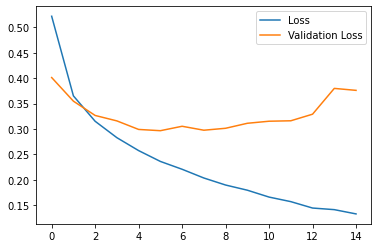

In [ ]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()

It appears that the model is overfitting a little.

# Accuracy per Iteration

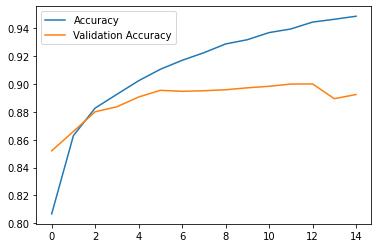

In [ ]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

As we can see that the validation accuracy remains some what constant but the validation loss is increasing this means that our model is becoming confident of the incorrect predictions it has made.

# Confusion Matrix

Confusion matrix, without normalization
[[885   0  19  12   4   1  72   0   6   1]
 [  3 972   2  11   4   0   4   0   4   0]
 [ 13   0 837   8  60   0  79   0   3   0]
 [ 21   2  22 886  40   2  27   0   0   0]
 [  1   0  69  17 791   0 117   0   5   0]
 [  0   0   0   2   0 971   0  19   0   8]
 [150   0  71  26  56   1 681   0  15   0]
 [  0   0   0   0   0  11   0 969   1  19]
 [  3   0   4   3   2   3   5   3 976   1]
 [  1   0   0   0   0   5   0  38   0 956]]


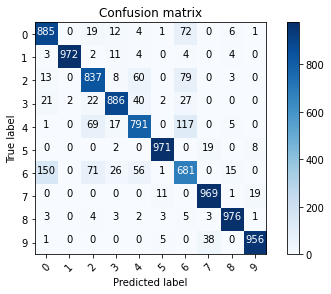

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# Observation

In [ ]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

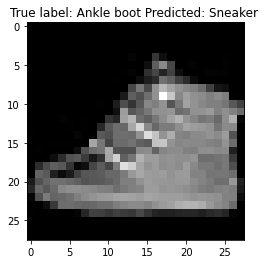

In [ ]:
# misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

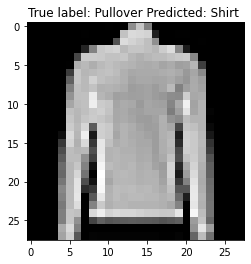

In [ ]:
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

As we can see the model has misclassified the examples which are even hard to classify through a human eye with such small image size. This means that it has still done a pretty good job.

# By: Rashi Saluja